/home/yuntian/anaconda3/envs/linux_QNM_env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


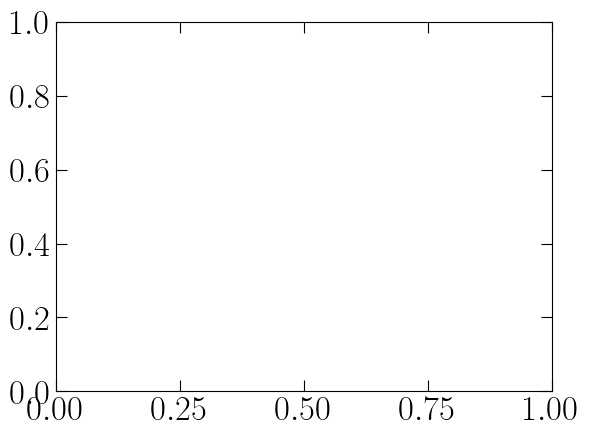

In [1]:
from scipy.interpolate import LinearNDInterpolator
import numpy as np
import matplotlib.pyplot as plt
import qnm
import math

plt.rcParams["xtick.labelsize"] = 25
plt.rcParams["ytick.labelsize"] = 25
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["xtick.minor.size"] = 4
plt.rcParams["ytick.minor.size"] = 4
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["axes.labelpad"] = 8
plt.rcParams["figure.constrained_layout.h_pad"] = 0
plt.rcParams["text.usetex"] = True
plt.rcParams["font.sans-serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "stix"
plt.tick_params(axis="both", which="minor", labelsize=18)

In [6]:
bkj_220r=[[1.0,       0.537583,   -2.990402,  1.503421],
     [-1.899567, -2.128633,  6.626680,   -2.903790],
     [1.015454,  2.147094,   -4.672847,  1.891731],
     [-0.111430, -0.581706,  1.021061,   -0.414517]]

ckj_220r=[[1.0,          0.548651,   -3.141145,  1.636377],
     [-2.238461,    -2.291933,  7.695570,   -3.458474],
     [1.581677,     2.662938,   -6.256090,  2.494264],
     [-0.341455,    -0.930069,  1.688288,   -0.612643]]

bkj_220i=[[1.0,          -2.721789,     2.472860,      -0.750015],
          [-2.533958,    7.181110,      -6.870324,     2.214689],
          [2.102750,     -6.317887,     6.206452,      -1.980749],
          [-0.568636,    1.857404,      -1.820547,     0.554722]]

ckj_220i=[[1.0,          -2.732346,     2.495049,      -0.761581],
          [-2.498341,    7.089542,      -6.781334,     2.181880],
          [2.056918,     -6.149334,     6.010021,      -1.909275],
          [-0.557557,    1.786783,      -1.734461,     0.524997]]

# 330
bkj_330r=[[1.0,         -0.311963,      -1.457057,      0.825692],
          [-1.928277,   -0.026433,      3.139427,       -1.484557],
          [1.044039,    0.545708,       -2.188569,      0.940019],
          [-0.112303,   -0.226402,      0.482482,       -0.204299]]

ckj_330r=[[1.0,         -0.299153,      -1.591595,      0.938987],
          [-2.265230,   0.058508,       3.772084,       -1.852247],
          [1.624332,    0.533096,       -3.007197,      1.285026],
          [-0.357651,   -0.300599,      0.810387,       -0.314715]]

bkj_330i=[[1.0,         -2.813977,      2.666759,       -0.850618],
          [-2.163575,   6.934304,       -7.425335,      2.640936],
          [1.405496,    -5.678573,      6.621826,       -2.345713],
          [-0.241561,   1.555843,       -1.890365,      0.637480]]

ckj_330i=[[1.0,         -2.820763,      2.680557,       -0.857462],
          [-2.130446,   6.825101,       -7.291058,      2.583282],
          [1.394144,    -5.533669,      6.393699,       -2.254239],
          [-0.261229,   1.517744,       -1.810579,      0.608393]]

# 221
bkj_221r=[[1.0,         -2.918987,      2.866252,       -0.944554],
          [-1.850299,   7.321955,       -8.783456,      3.292966],
          [0.944088,    -5.584876,      7.675096,       -3.039132],
          [-0.088458,   1.198758,       -1.973222,      0.838109]]

ckj_221r=[[1.0,         -2.941138,      2.907859,       -0.964407],
          [-2.250169,   8.425183,       -9.852886,      3.660289],
          [1.611393,    -7.869432,      9.999751,       -3.737205],
          [-0.359285,   2.392321,       -3.154979,      1.129776]]

bkj_221i=[[1.0,         -3.074983,      3.182195,       -1.105297],
          [0.366066,    4.296285,       -9.700146,      5.016955],
          [-3.290350,   -0.844265,      9.999863,       -5.818349],
          [1.927196,    -0.401520,      -3.537667,      2.077991]]

ckj_221i=[[1.0,         -3.079686,      3.191889,       -1.110140],
          [0.388928,    4.159242,       -9.474149,      4.904881],
          [-3.119527,   -0.914668,      9.767356,       -5.690517],
          [1.746957,    -0.240680,      -3.505359,     2.049254]]

In [ ]:
N=20
r=np.linspace(0,1,N+1)

d_phi_list=np.zeros(len(r))
n_phi_list=np.zeros(len(r))

for i in range(len(r)):
    if(i==0):
        d_phi_list[i]=0
        n_phi_list[i]=1
    else:
        dphi=1/r[i]/N
        Nphi=np.pi/2/dphi
        n_phi_list[i]=math.ceil(Nphi)
        d_phi_list[i]=np.pi/2/n_phi_list[i]

Nxy=np.sum(n_phi_list)
Q=np.zeros(Nxy)
af=np.zeros(Nxy)

In [17]:
qnm.modes_cache(s=-2,l=3,m=3,n=0)(a=0)[0]

(0.5994432884374902-0.09270304794494749j)